# 1. Introduce project

The New York City Airbnb dataset provides a closer look into different features of the Airbnb properties, across New York City.

This project aims to explore and analyze this dataset to uncover patterns, trends, and insights and to build predictive models that can estimate rental prices, and identify key features that contribute to price of an Airbnb listing. Through this analysis, we hope to provide valuable insights that can enhance the Airbnb experience for both hosts and guests in New York City.

The NYC Airbnb dataset on Kaggle provides comprehensive information about Airbnb listings in New York City. It includes features such as:

- Listing details: Name, room type, and price
- Location data: Neighbourhood group (Manhattan, Brooklyn, etc.), neighborhood, latitude, and longitude
- Host information: Host ID, name, and number of listings managed
- Availability and reviews: Number of reviews, last review date, review scores, and availability over the year

# 2. Import Packages

In [183]:
#Importing the Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Scikit-Learn ML Libraries :
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [184]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [185]:
# Loading dataset
df = pd.read_csv('AB_NYC_2019/AB_NYC_2019.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [186]:
# Check null values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [187]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [188]:
# Drop irrelevant columns
df.drop(['id','name','host_id','host_name','last_review'], axis=1, inplace=True)

In [189]:
df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [190]:
mean = df['reviews_per_month'].mean()
df['reviews_per_month'].fillna(mean, inplace=True)

In [191]:
df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [192]:
df['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [193]:
tar_col = 'price'
num_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(exclude='number').columns.tolist()
num_cols, cat_cols,tar_col

(['latitude',
  'longitude',
  'price',
  'minimum_nights',
  'number_of_reviews',
  'reviews_per_month',
  'calculated_host_listings_count',
  'availability_365'],
 ['neighbourhood_group', 'neighbourhood', 'room_type'],
 'price')

# 3. EDA

## 3.1 Analyze categorical variables

### 3.1.1 Neighbourhood Group

Text(0.5, 1.0, 'Neighbourhood Group')

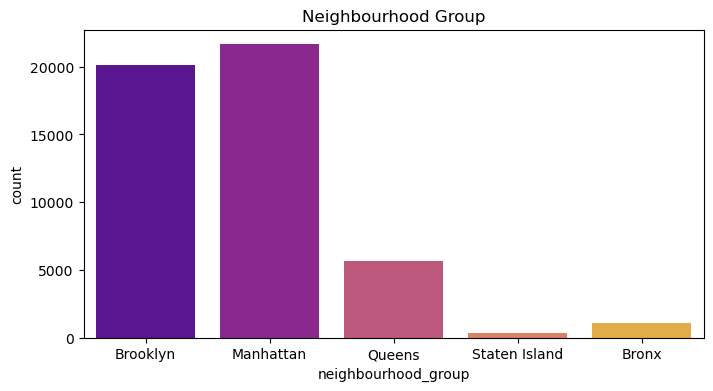

In [197]:
sns.countplot(x=df['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(8,4)
plt.title('Neighbourhood Group')

### 3.1.2 Room Type

Text(0.5, 1.0, 'Room Type')

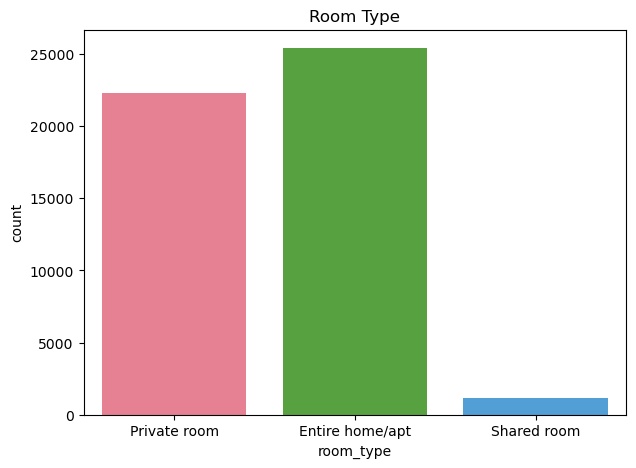

In [199]:
sns.countplot(x=df['room_type'], palette="husl")
fig = plt.gcf()
fig.set_size_inches(7,5)
plt.title('Room Type')

## 3.2 Analyze numeric variables

In [201]:
# Statistics of num cols
df[num_cols].describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.497775,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### 3.2.1 Univariate Analysis

#### Distribution of Availability

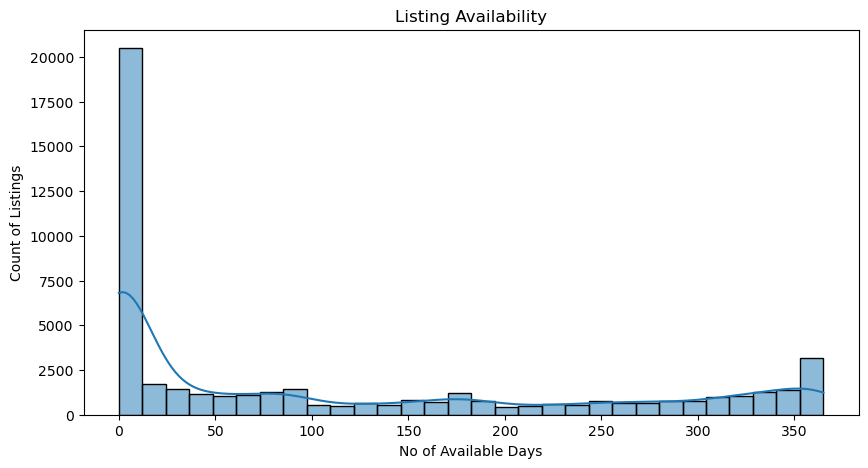

In [204]:
# Plot availability within 365 days
plt.figure(figsize=(10, 5))
sns.histplot(df['availability_365'], bins=30, kde=True)
plt.xlabel('No of Available Days')
plt.ylabel('Count of Listings')
plt.title('Listing Availability')
plt.show()

The distribution of Availability Days within a year is highly skewed towards the low and high end. There are a large number of properties that are not available or available only for a couple of days each year.

#### Availabity across inspected area

Text(0.5, 1.0, 'Distribution of Listing Availability across NY area')

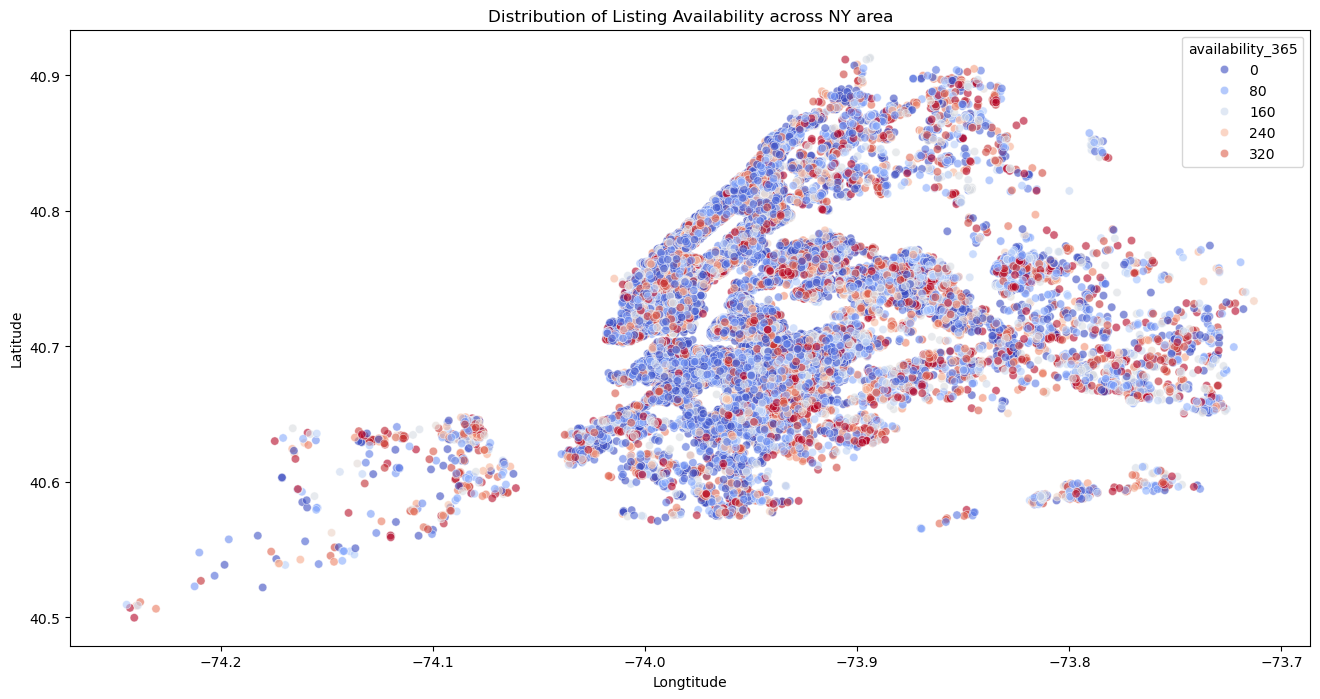

In [207]:
# Plot availability within 365 days across NY area
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='availability_365',sizes=(1, 100), palette='coolwarm', alpha=0.6)
plt.xlabel('Longtitude')
plt.ylabel('Latitude')
plt.title('Distribution of Listing Availability across NY area')

### 3.2.2 Multivariate Analysis

#### Availability of properties in same Neighborhood Group

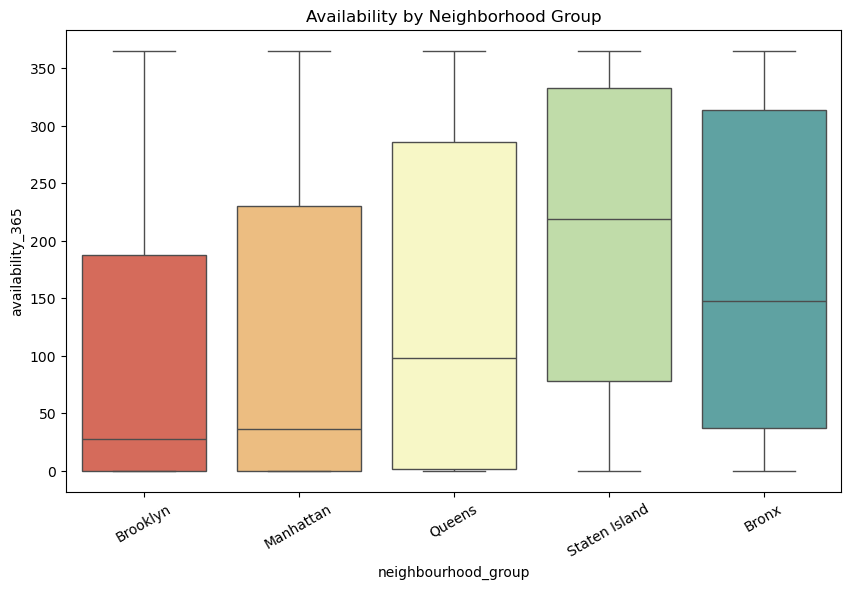

In [210]:
# Plot availability of neighbourhood_group
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='neighbourhood_group', y='availability_365', palette='Spectral')
plt.xticks(rotation=30)
plt.title('Availability by Neighborhood Group')
plt.show()

#### Price distribution by Neighborhood Group

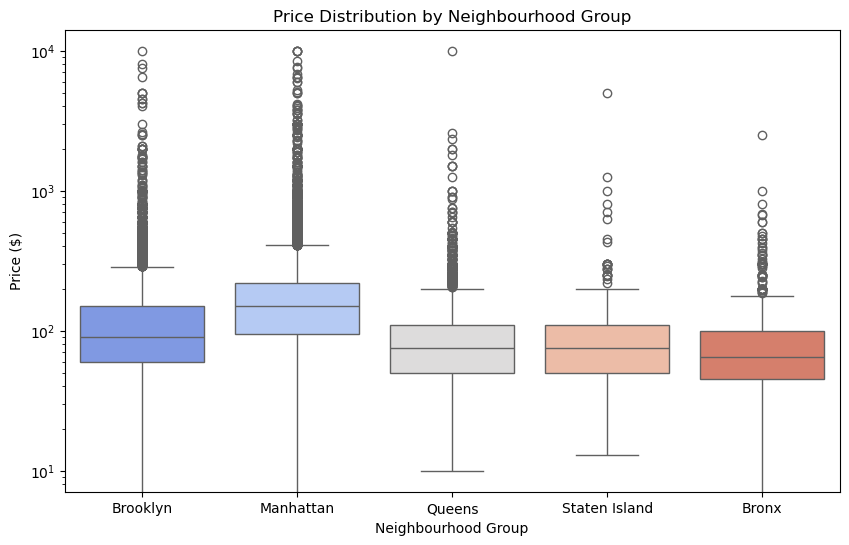

In [212]:
# Plot price vs neighbourhood_group
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="neighbourhood_group", y="price", palette="coolwarm")
plt.yscale("log")  # Log scale for better visualization if prices vary widely
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price ($)")
plt.title("Price Distribution by Neighbourhood Group")
plt.show()

<Axes: xlabel='price', ylabel='Density'>

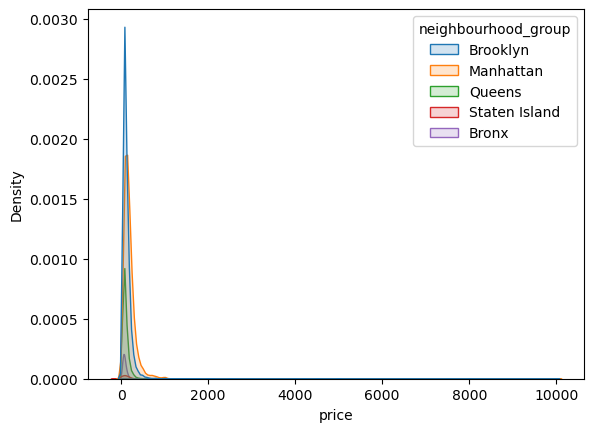

In [213]:
# Price distrubition by neighbourhood_group
sns.kdeplot(df, x=tar_col, hue='neighbourhood_group', fill=True, alpha=0.2)

#### Price distribution by Room Type

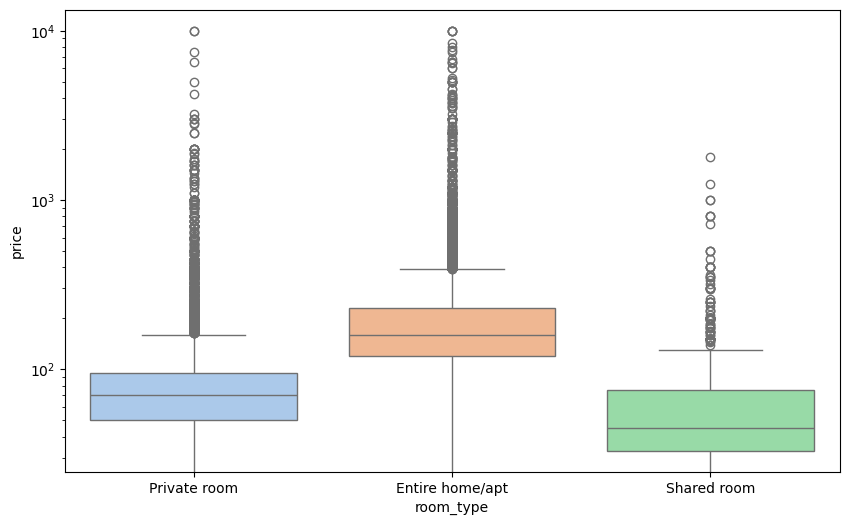

In [215]:
# Plot price vs room_type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="room_type", y="price", palette="pastel")
plt.yscale("log")  # Log scale for better visualization if prices vary widely
plt.show()

In [216]:
tar_col

'price'

#### Correlation Map

<Axes: >

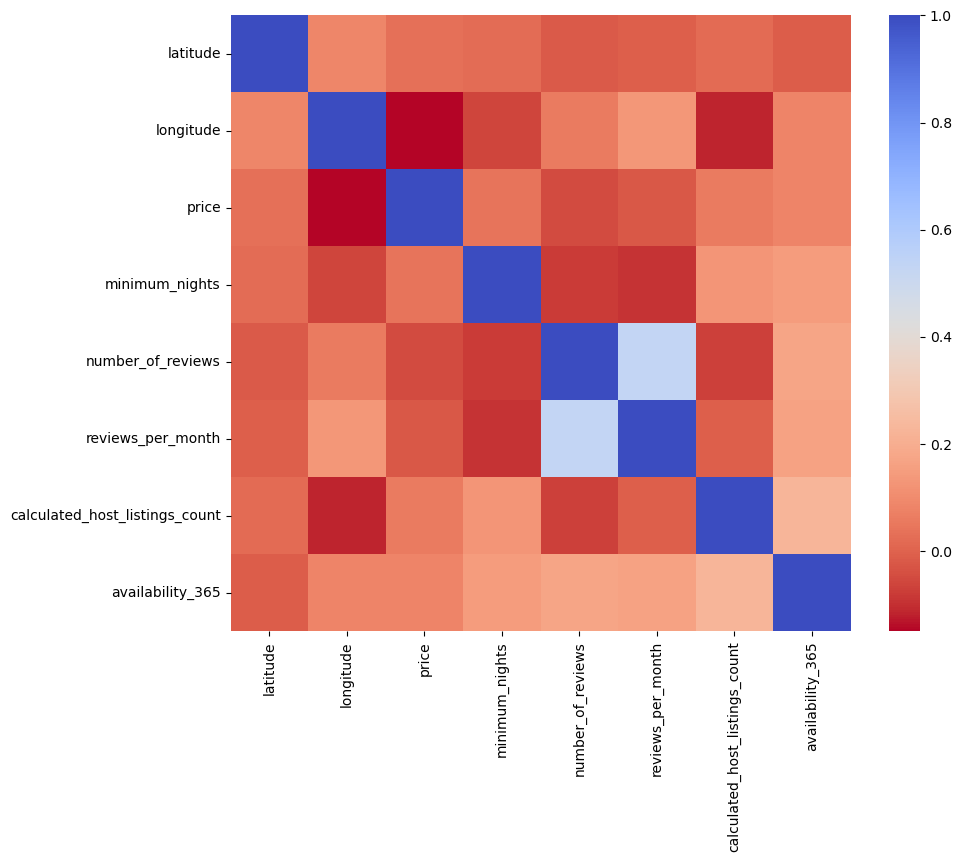

In [218]:
# Correlation map
f, ax1 = plt.subplots(1, 1, figsize=(10,8))

# Entire DataFrame
corr = df[num_cols].corr()
sns.heatmap(corr, cmap='coolwarm_r', ax=ax1)

In [219]:
# Sort the value
corr[tar_col].sort_values()

longitude                        -0.150019
number_of_reviews                -0.047954
reviews_per_month                -0.022373
latitude                          0.033939
minimum_nights                    0.042799
calculated_host_listings_count    0.057472
availability_365                  0.081829
price                             1.000000
Name: price, dtype: float64

There seems no strong collaboration between variables

## 3.3 Analyze Target

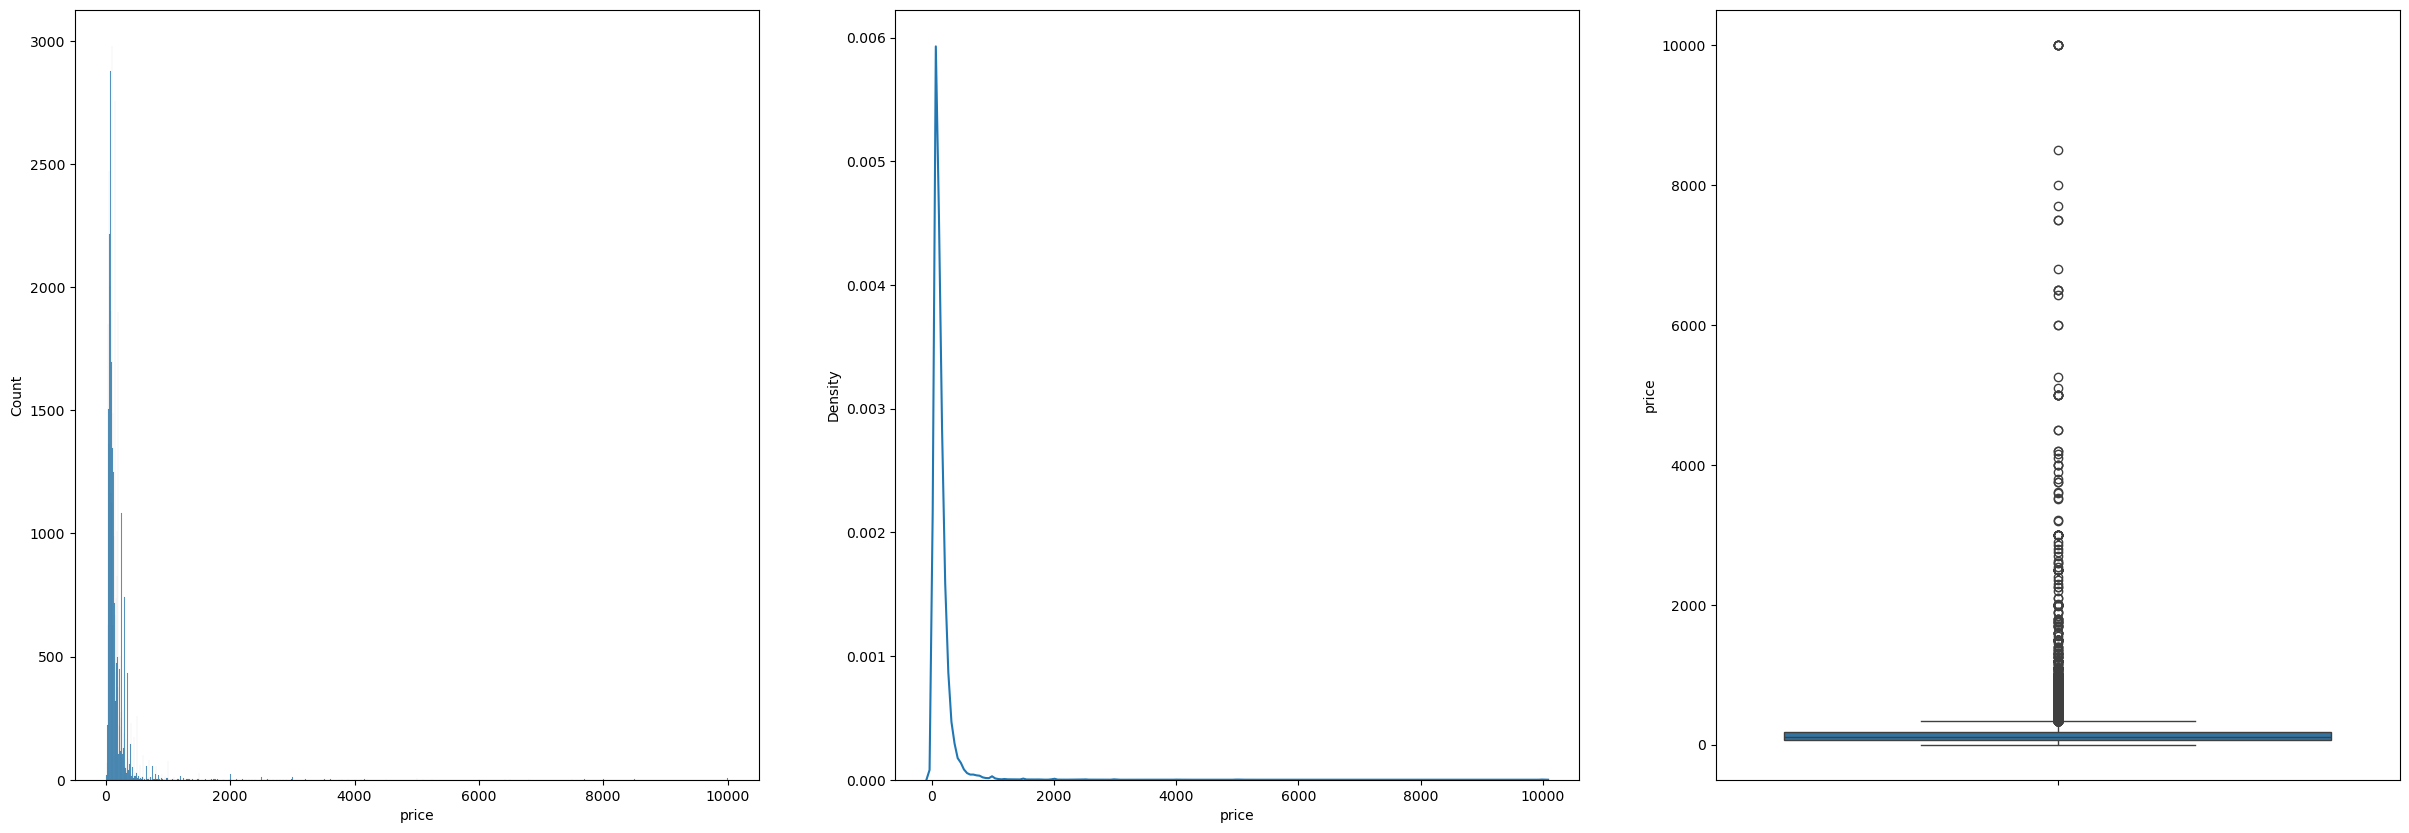

In [222]:
fig, axs = plt.subplots(1, 3, figsize=(30,10))
sns.histplot(df[tar_col],ax=axs[0])
sns.kdeplot(df[tar_col],ax=axs[1])
sns.boxplot(df[tar_col], ax=axs[2])
plt.show()

In [223]:
tar_col = 'price'
df['price_log'] = np.log1p(df['price'])

### 3.3.1 Analyze Target after transformation by log

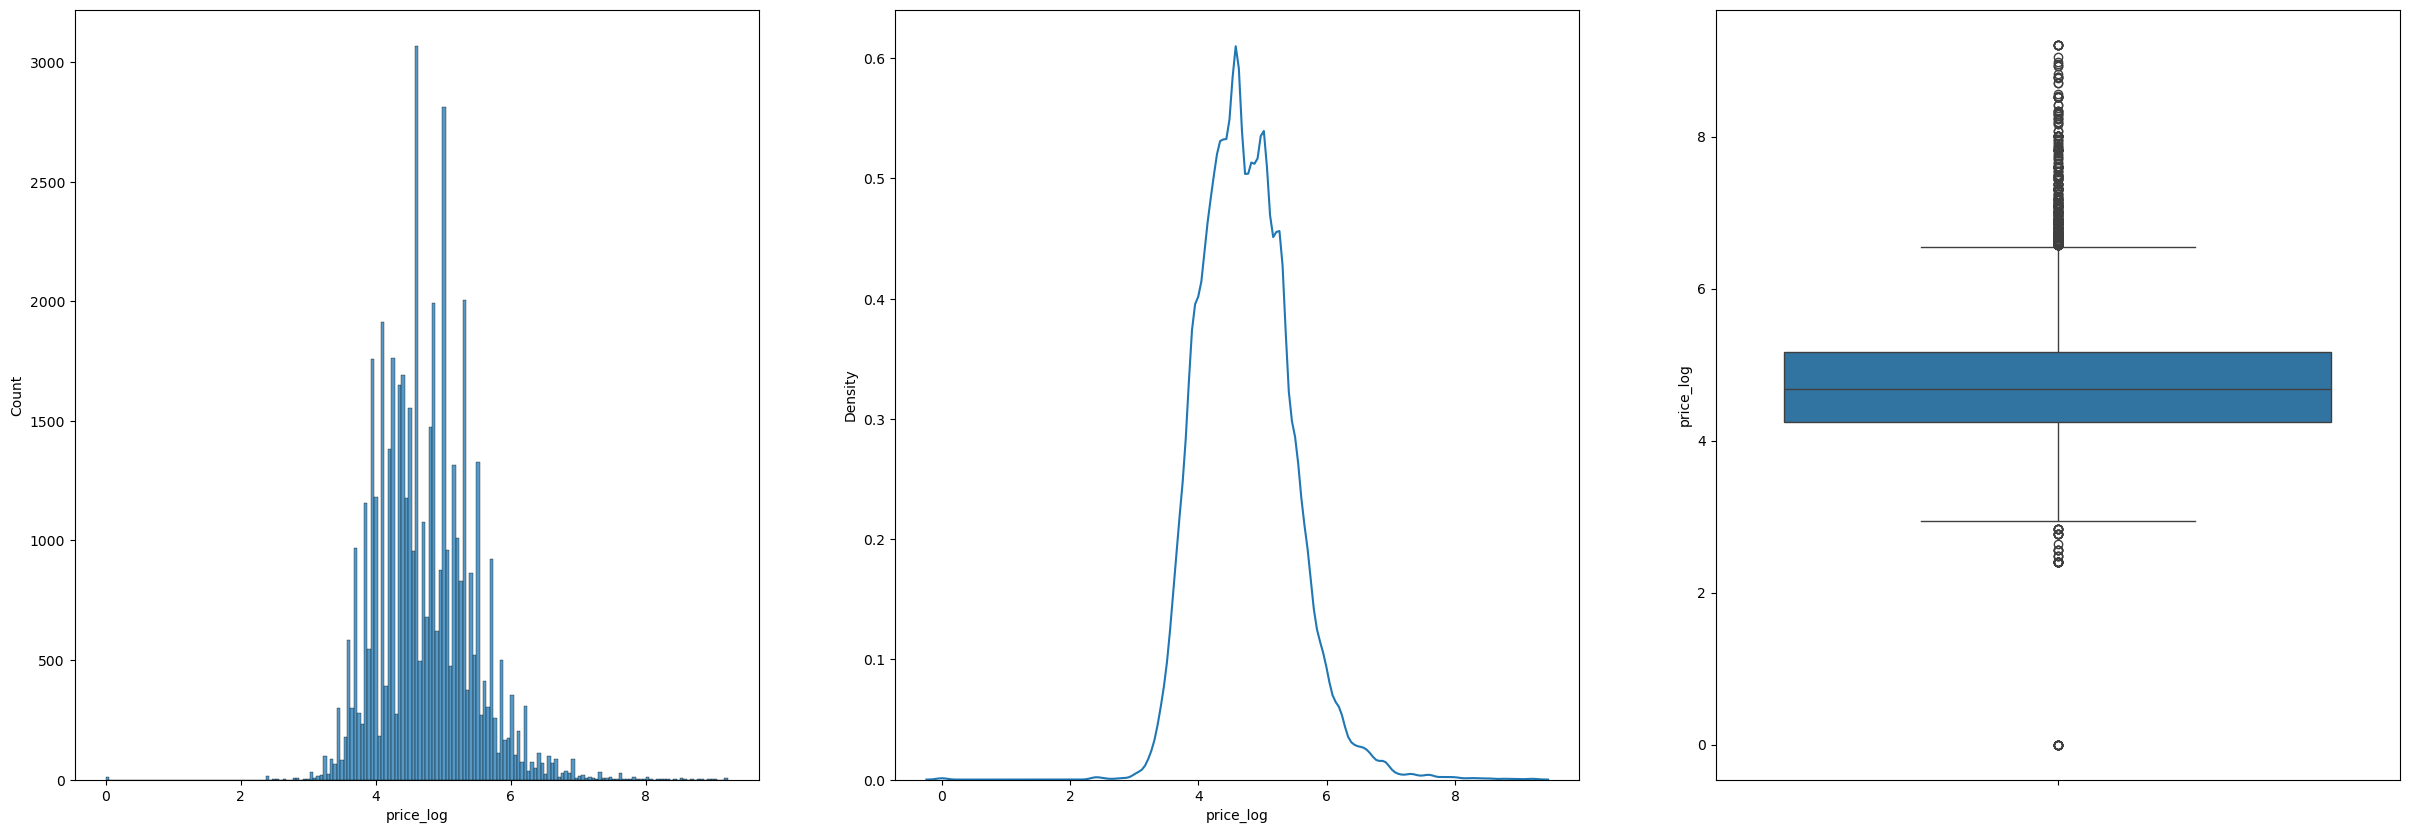

In [225]:
fig, axs = plt.subplots(1, 3, figsize=(30,10))
sns.histplot(df['price_log'],ax=axs[0])
sns.kdeplot(df['price_log'],ax=axs[1])
sns.boxplot(df['price_log'], ax=axs[2])
plt.show()

# 4. Feature Extraction

## 4.1 Create availibity_ratio

In [228]:
# Create availability_ratio
df['availability_ratio'] = df['availability_365'] / 365
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log,availability_ratio
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365,5.010635,1.000000
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355,5.420535,0.972603
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365,5.017280,1.000000
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194,4.499810,0.531507
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0,4.394449,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,1.373221,2,9,4.262680,0.024658
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,1.373221,2,36,3.713572,0.098630
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1.373221,1,27,4.753590,0.073973
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,1.373221,6,2,4.025352,0.005479


## 4.2 Create total_income

In [230]:
# Create total_income
df['total_income'] = df['price'] * (365 - df['availability_365'])
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log,availability_ratio,total_income
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365,5.010635,1.000000,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355,5.420535,0.972603,2250
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365,5.017280,1.000000,0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194,4.499810,0.531507,15219
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0,4.394449,0.000000,29200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,1.373221,2,9,4.262680,0.024658,24920
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,1.373221,2,36,3.713572,0.098630,13160
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1.373221,1,27,4.753590,0.073973,38870
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,1.373221,6,2,4.025352,0.005479,19965


# 5. Model Training

## Split Test Data

In [232]:
random_seed=42

In [233]:
train, test = train_test_split(df, test_size=0.2, random_state=random_seed)

In [234]:
train

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log,availability_ratio,total_income
32645,Brooklyn,Williamsburg,40.71577,-73.95530,Entire home/apt,295,3,11,0.870000,1,1,5.690359,0.002740,107380
23615,Manhattan,Washington Heights,40.84917,-73.94048,Private room,70,2,2,0.160000,1,0,4.262680,0.000000,25550
31183,Brooklyn,Bedford-Stuyvesant,40.68993,-73.95947,Private room,58,2,0,1.373221,2,0,4.077537,0.000000,21170
29260,Brooklyn,Bedford-Stuyvesant,40.68427,-73.93118,Entire home/apt,75,3,87,4.910000,1,267,4.330733,0.731507,7350
7275,Queens,Woodside,40.74705,-73.89564,Private room,38,5,13,0.250000,1,0,3.663562,0.000000,13870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,Manhattan,Washington Heights,40.84650,-73.94319,Shared room,60,1,0,1.373221,1,0,4.110874,0.000000,21900
44732,Manhattan,Chelsea,40.73957,-74.00082,Private room,85,2,4,1.900000,1,76,4.454347,0.208219,24565
38158,Manhattan,Upper West Side,40.78318,-73.97372,Entire home/apt,130,30,1,0.340000,5,261,4.875197,0.715068,13520
860,Manhattan,Upper West Side,40.77508,-73.97990,Entire home/apt,150,2,11,0.130000,1,2,5.017280,0.005479,54450


In [235]:
test

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log,availability_ratio,total_income
879,Brooklyn,Kensington,40.64354,-73.97777,Entire home/apt,89,3,62,0.710000,1,189,4.499810,0.517808,15664
44383,Queens,Ridgewood,40.70666,-73.90779,Private room,30,21,0,1.373221,1,73,3.433987,0.200000,8760
15394,Manhattan,Hell's Kitchen,40.76116,-73.99016,Private room,120,2,17,0.430000,1,0,4.795791,0.000000,43800
43230,Manhattan,Financial District,40.70763,-74.01050,Entire home/apt,470,2,5,1.880000,327,272,6.154858,0.745205,43710
16332,Manhattan,East Harlem,40.79658,-73.93287,Entire home/apt,199,2,30,0.800000,1,30,5.298317,0.082192,66665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20477,Manhattan,East Village,40.72543,-73.99129,Entire home/apt,215,2,18,0.700000,1,68,5.375278,0.186301,63855
44969,Manhattan,Midtown,40.76352,-73.98280,Private room,100,1,0,1.373221,6,294,4.615121,0.805479,7100
36577,Queens,Flushing,40.75914,-73.83352,Private room,70,1,5,0.820000,4,5,4.262680,0.013699,25200
11477,Manhattan,East Village,40.72179,-73.97951,Entire home/apt,500,2,0,1.373221,1,0,6.216606,0.000000,182500


In [236]:
X_train = train.drop(columns=['price', 'price_log'])
y_train = train['price']
X_test = test.drop(columns=['price', 'price_log'])
y_test = test['price']

In [237]:
X_train.shape

(39116, 12)

In [238]:
X_test.shape

(9779, 12)

In [239]:
X_train

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,availability_ratio,total_income
32645,Brooklyn,Williamsburg,40.71577,-73.95530,Entire home/apt,3,11,0.870000,1,1,0.002740,107380
23615,Manhattan,Washington Heights,40.84917,-73.94048,Private room,2,2,0.160000,1,0,0.000000,25550
31183,Brooklyn,Bedford-Stuyvesant,40.68993,-73.95947,Private room,2,0,1.373221,2,0,0.000000,21170
29260,Brooklyn,Bedford-Stuyvesant,40.68427,-73.93118,Entire home/apt,3,87,4.910000,1,267,0.731507,7350
7275,Queens,Woodside,40.74705,-73.89564,Private room,5,13,0.250000,1,0,0.000000,13870
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,Manhattan,Washington Heights,40.84650,-73.94319,Shared room,1,0,1.373221,1,0,0.000000,21900
44732,Manhattan,Chelsea,40.73957,-74.00082,Private room,2,4,1.900000,1,76,0.208219,24565
38158,Manhattan,Upper West Side,40.78318,-73.97372,Entire home/apt,30,1,0.340000,5,261,0.715068,13520
860,Manhattan,Upper West Side,40.77508,-73.97990,Entire home/apt,2,11,0.130000,1,2,0.005479,54450


In [240]:
num_cols = X_train.select_dtypes('number').columns
cat_cols = X_train.select_dtypes(exclude='number').columns
num_cols, cat_cols, tar_col

(Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
        'reviews_per_month', 'calculated_host_listings_count',
        'availability_365', 'availability_ratio', 'total_income'],
       dtype='object'),
 Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object'),
 'price')

## 5.1 Linear Regression (base model)

### 5.1.1 Data Pipeline/ Feature Scaling

In [244]:
# Preprocessors
numerical_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', RobustScaler())]),
                                 Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'availability_ratio', 'total_income'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object'))])

In [245]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearRegression())
])
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'availability_ratio', 'total_income'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object'))])),
                ('classifier', LinearRegression())])

### 5.1.2 Model Pipeline

In [247]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'availability_ratio', 'total_income'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object'))])),
                ('classifier', LinearRegression())])

### 5.1.3 Training

In [249]:
# Making predictions on the test set
y_pred_1 = model.predict(X_test)

### 5.1.4 Evaluation

In [251]:
mae_1 = mean_absolute_error(y_test, y_pred_1)
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred_1))
r2_1 = r2_score(y_test, y_pred_1)

In [252]:
mae_1, rmse_1,r2_1

(42.71019519799589, 134.95506151760722, 0.5883003146559763)

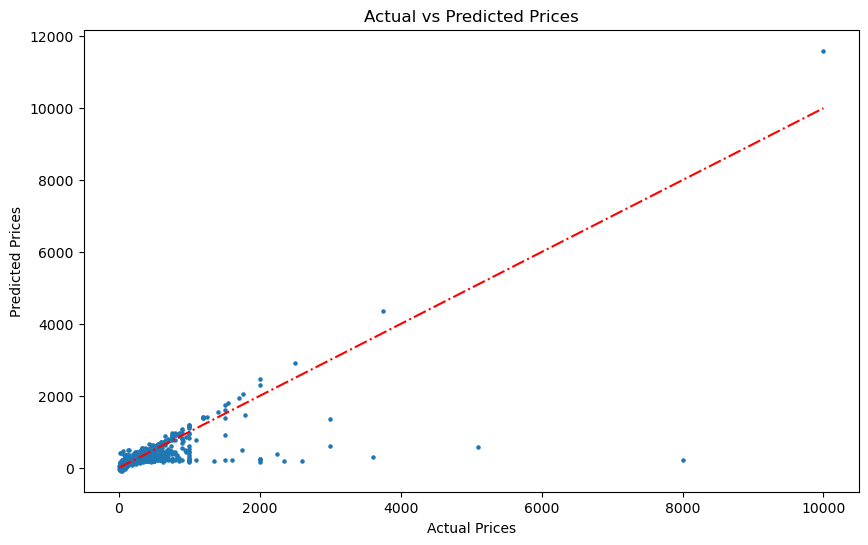

In [253]:
# Visualizing the predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_1, s=5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-.')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
# plt.grid()
plt.show()

## 5.2 XGBoost

### 5.2.1 Model

In [256]:
from xgboost import XGBRegressor
model_2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor())
])
model_2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'availability_ratio', 'total_income'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEnc...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

### 5.2.2 Training

In [258]:
model_2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'availability_ratio', 'total_income'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEnc...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [259]:
y_pred_2 = model_2.predict(X_test)

### 5.2.3 Evaluation

In [261]:
mae_2 = mean_absolute_error(y_test, y_pred_2)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred_2))
r2_2 = r2_score(y_test, y_pred_2)

In [262]:
mae_2, rmse_2, r2_2

(15.59562267278501, 165.43528163446658, 0.3813309073448181)

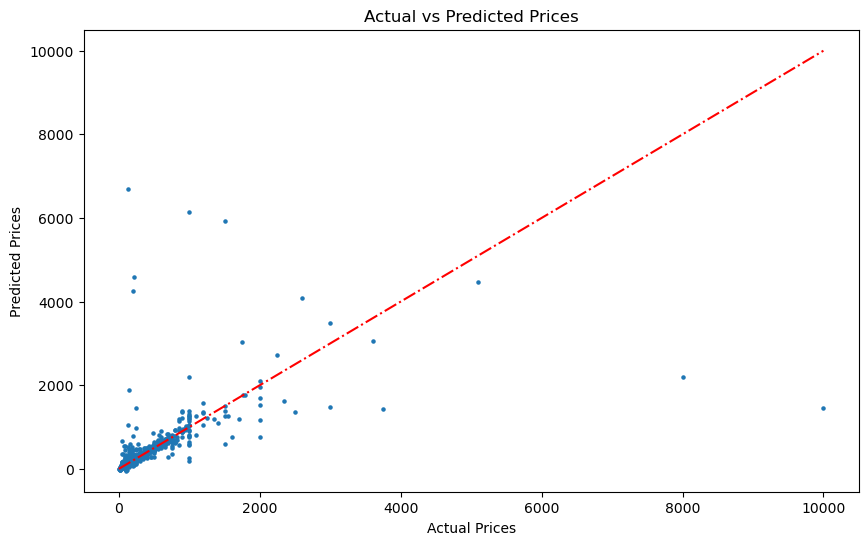

In [263]:
# Visualizing the predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_2, s=5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-.')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
# plt.grid()
plt.show()

## 5.3 XGBoost (predict on price_log)

In [265]:
y_train_log = train['price_log']
y_test_log = test['price_log']
tar_col = 'price_log'

### 5.3.1 Model

In [267]:
model_3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor())
])
model_3

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'availability_ratio', 'total_income'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEnc...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [268]:
model_3.fit(X_train, y_train_log)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'availability_ratio', 'total_income'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEnc...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

### 5.3.2 Training

In [270]:
y_pred_3log = model_3.predict(X_test)

In [271]:
y_pred_3log[:5]

array([4.431257 , 3.426759 , 4.7853184, 6.124543 , 5.3068213],
      dtype=float32)

### 5.3.3 Evaluation

In [273]:
# Convert predictions back to original scale
y_pred_3 = np.expm1(y_pred_3log)
y_pred_3

array([ 83.036964,  29.776733, 118.73948 , ...,  68.71632 , 490.40305 ,
       132.38936 ], dtype=float32)

In [274]:
mae_3 = mean_absolute_error(y_test, y_pred_3)
rmse_3 = np.sqrt(mean_squared_error(y_test, y_pred_3))
r2_3 = r2_score(y_test, y_pred_3)
mae_3, rmse_3, r2_3

(10.850960425981878, 126.28025137024231, 0.6395267248153687)

## 5.4 Deep Learning

### 5.4.1 Data Pipeline

In [278]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', RobustScaler())]),
                                 Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'availability_ratio', 'total_income'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object'))])

In [279]:
# Apply preprocessing
X_train_tf = preprocessor.fit_transform(X_train)
X_test_tf = preprocessor.transform(X_test)

In [280]:
X_train.shape, X_train_tf.shape

((39116, 12), (39116, 237))

### 5.4.2 Model

In [282]:

# Define the model
model_4 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_tf.shape[1],)),  # Input layer
    Dropout(0.2),  # Dropout for regularization
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.2),  # Dropout for regularization
    Dense(32, activation='relu'),  # Hidden layer
    Dense(1)  # Output layer (no activation for regression)
])

# Compile the model
model_4.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

In [283]:
# Train the model
history = model_4.fit(
    X_train_tf, y_train,
    validation_split=0.2,  # Use 20% of training data for validation
    epochs=50,  # Number of epochs
    batch_size=32,  # Batch size
    verbose=1  # Show progress
)

Epoch 1/50
978/978 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step - loss: 72.1966 - mae: 72.1966 - val_loss: 27.0227 - val_mae: 27.0227
Epoch 2/50
978/978 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - loss: 31.9020 - mae: 31.9020 - val_loss: 23.6103 - val_mae: 23.6103
Epoch 3/50
978/978 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - loss: 29.6768 - mae: 29.6768 - val_loss: 23.5065 - val_mae: 23.5065
Epoch 4/50
978/978 ━━━━━━━━━━━━━━━━━━━━ 1s 715us/step - loss: 28.5898 - mae: 28.5898 - val_loss: 20.6873 - val_mae: 20.6873
Epoch 5/50
978/978 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - loss: 28.4026 - mae: 28.4026 - val_loss: 21.1572 - val_mae: 21.1572
Epoch 6/50
978/978 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - loss: 26.0156 - mae: 26.0156 - val_loss: 20.4308 - val_mae: 20.4308
Epoch 7/50
978/978 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - loss: 24.7017 - mae: 24.7017 - val_loss: 18.9321 - val_mae: 18.9321
Epoch 8/50
978/978 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - loss: 25.8311 - mae: 25.8311 - val_loss: 16.7080 - val_mae: 16.7080
Epoch 9/

In [284]:
# Evaluate the model
test_loss, test_mae = model_4.evaluate(X_test_tf, y_test, verbose=0)
print(f"Test MAE: {test_mae}")

Test MAE: 23.55597686767578


In [285]:
# Make predictions
y_pred_4 = model_4.predict(X_test_tf)

# Compare predictions with actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_4.flatten()})
print(results.head())

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
       Actual   Predicted
879        89   82.921768
44383      30   39.916367
15394     120  111.727631
43230     470  240.934830
16332     199  172.838577


### 5.4.3 Evaluation

In [287]:
mae_4 = mean_absolute_error(y_test, y_pred_4)
rmse_4 = np.sqrt(mean_squared_error(y_test, y_pred_4))
r2_4 = r2_score(y_test, y_pred_4)
mae_4, rmse_4, r2_4

(23.555984617413305, 114.88328013675682, 0.7016570568084717)

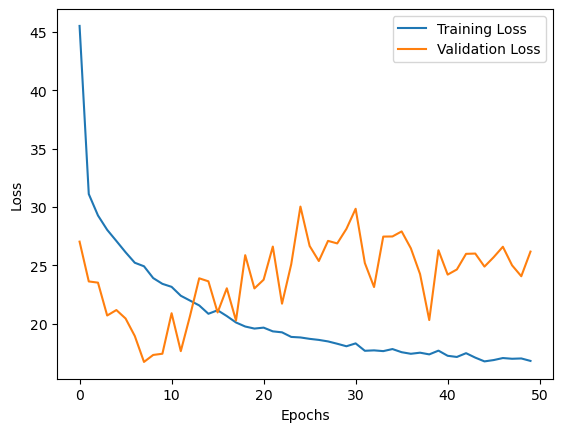

In [288]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 6. Model Evaluation

In [290]:
result = [
    ['1', mae_1, rmse_1, r2_1],
    ['2', mae_2, rmse_2, r2_2],
    ['3', mae_3, rmse_3, r2_3],
    ['4', mae_4, rmse_4, r2_4]
]
df = pd.DataFrame(result, columns=['exp','mae','rmse','r2']).set_index('exp')
df.sort_values(by='rmse')

,mae,rmse,r2
exp,,,
4,23.555985,114.883280,0.701657
3,10.850960,126.280251,0.639527
1,42.710195,134.955062,0.588300
2,15.595623,165.435282,0.381331
